파리바게뜨와 뚜레주르

배스킨라빈스와 던킨도너츠

In [2]:
import pandas as pd   
import numpy as np   
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/User/Desktop/opendata/data/상가업소정보_201912_01.csv', sep='|')

In [4]:
df.shape

(573680, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [7]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [8]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [9]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

C:\Users\User\AppData\Local\Temp\ipykernel_13772\3099769027.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


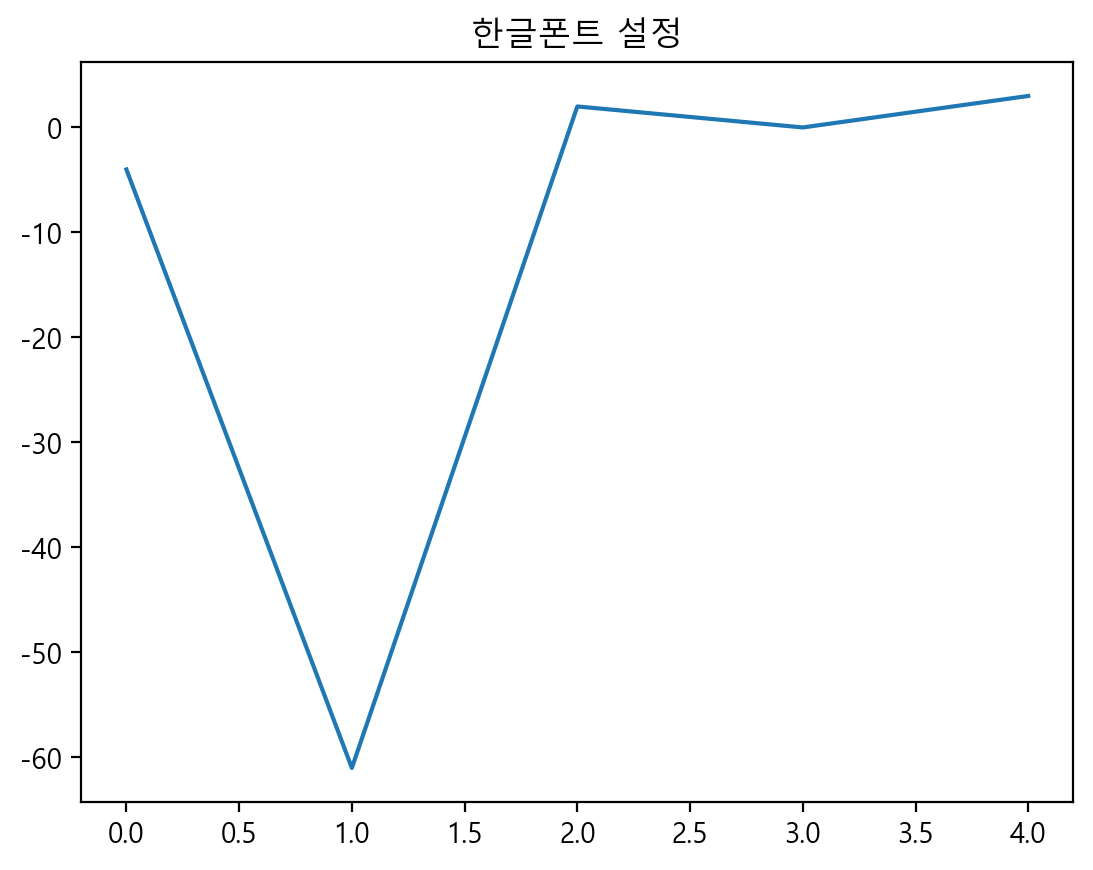

In [10]:
plt.title('한글폰트 설정')
plt.plot([-4,-61,2,0,3])

## 전처리

<Axes: >

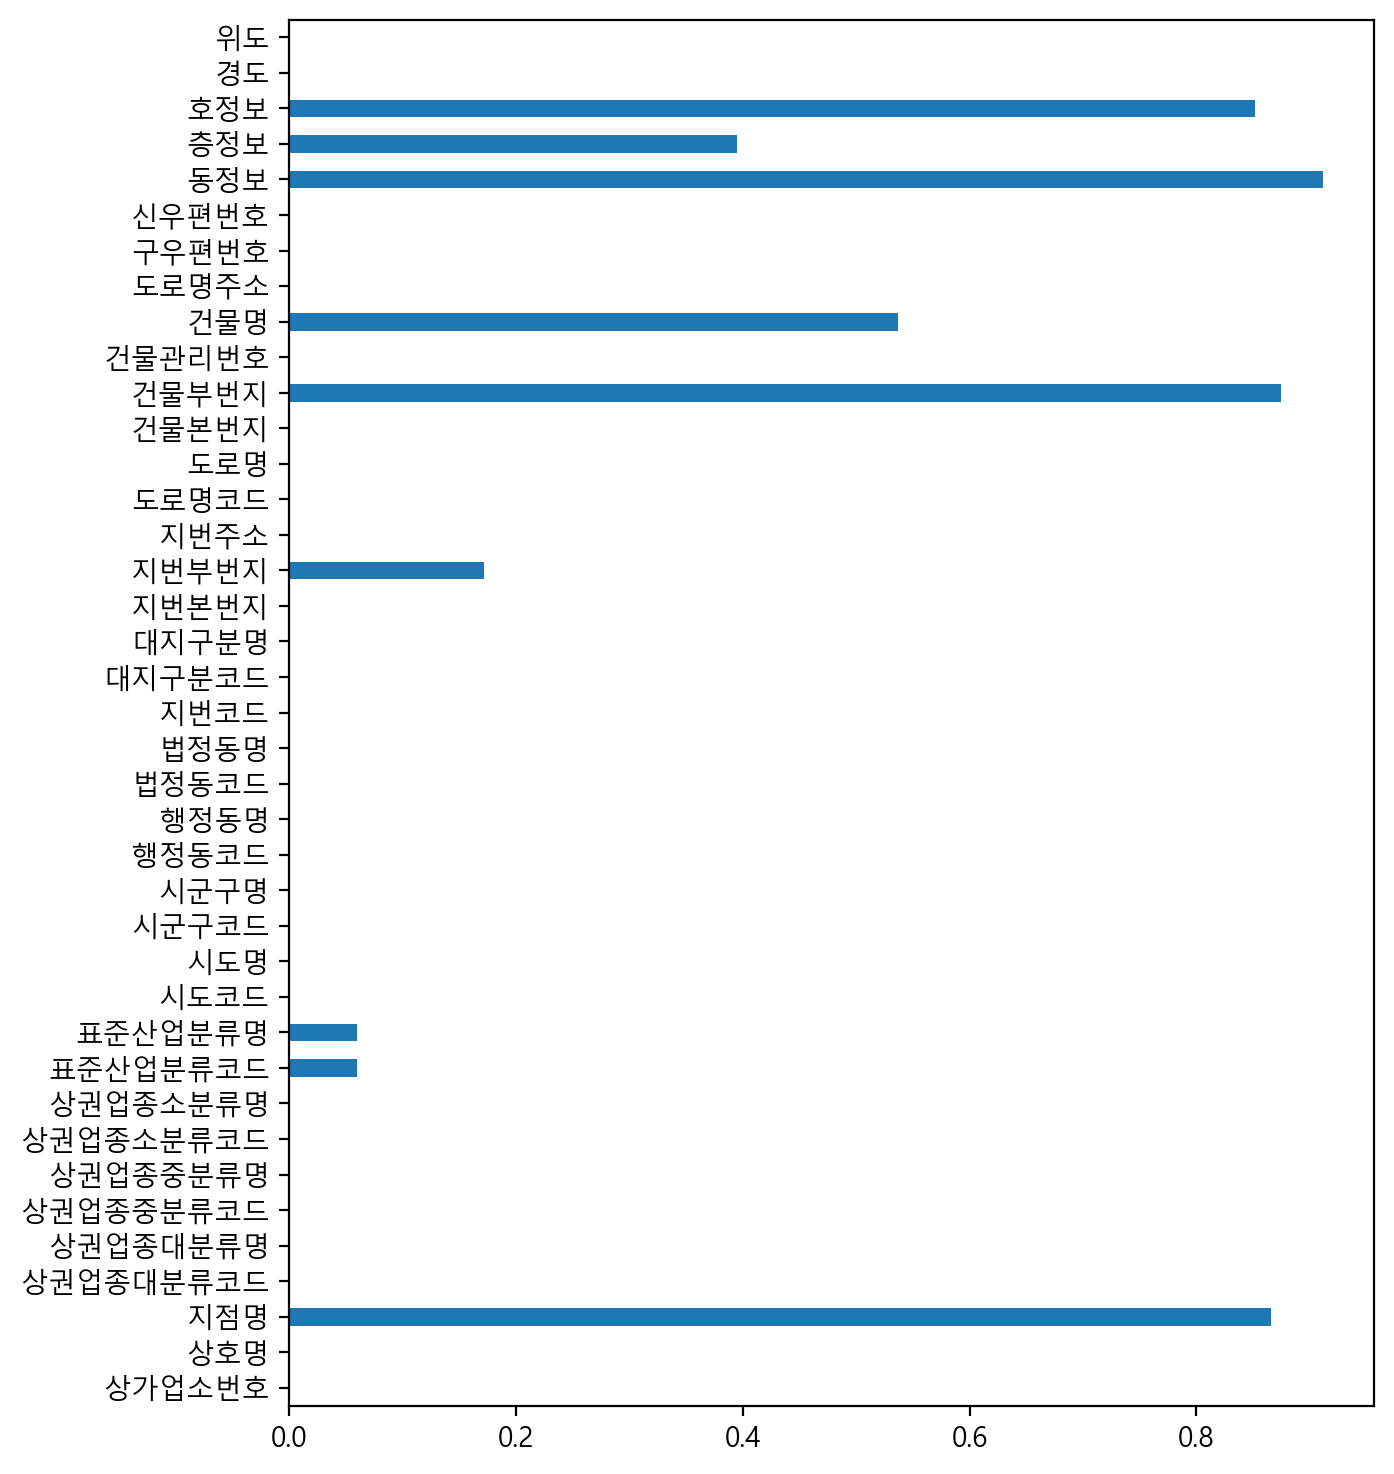

In [11]:
# 결측치 확인
df.isnull().mean().plot.barh(figsize=(7,9))

In [12]:
# 사용하지 않는 컬럼 제거
columns = ['상호명','상권업종대분류명','상권업종중분류명','상권업종소분류명',
           '시도명','시군구명','행정동명','법정동명','도로명주소',
           '경도','위도']
columns

['상호명',
 '상권업종대분류명',
 '상권업종중분류명',
 '상권업종소분류명',
 '시도명',
 '시군구명',
 '행정동명',
 '법정동명',
 '도로명주소',
 '경도',
 '위도']

In [14]:
print(df.shape)
df = df[columns].copy()
df.shape

(573680, 39)


(573680, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


In [16]:
# 시도명이 서울로 시작하는 데이터만
df_seoul = df[df['시도명'] == '서울특별시'].copy()
print(df_seoul.shape)
df_seoul.head()

(407376, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


In [17]:
df_seoul['시군구명'].unique()

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

In [18]:
df_seoul['시군구명'].nunique()

25

In [19]:
df_seoul.to_csv("seoul_open_store.csv", index=False)

In [20]:
pd.read_csv("seoul_open_store.csv").head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
4,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


## 배스킨라빈스, 던킨도너츠 위치 분석

In [21]:
df_seoul['상호명_소문자']  = df_seoul['상호명'].str.lower()

In [22]:
df_seoul['상호명_소문자'].str.extract('(베|배)스킨라빈스|baskinrobbins')[0].value_counts()

배    347
베    117
Name: 0, dtype: int64

In [23]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('배스킨라빈스|베스킨라빈스|baskinrobbins'),
            '상호명_소문자'].shape

(466,)

In [24]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('던킨|dunkin'), '상호명_소문자'].shape


(191,)

In [25]:
df_31 = df_seoul[df_seoul['상호명_소문자'].str.contains(
    '배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin')].copy()
df_31.shape

(657, 12)

In [26]:
df_31.loc[df_31['상호명_소문자'].str.contains(
    '배스킨라빈스|베스킨라빈스|baskinrobbins'), '브랜드명'] = '배스킨라빈스'
df_31[['상호명','브랜드명']].head()

,상호명,브랜드명
76,배스킨라빈스,배스킨라빈스
1167,던킨도너츠,NaN
1819,던킨도너츠테크노마트점,NaN
2164,베스킨라빈스,배스킨라빈스
2305,던킨도너츠창동하나로,NaN


In [27]:
df_31['브랜드명'] = df_31['브랜드명'].fillna('던킨도너츠')
df_31['브랜드명']

76        배스킨라빈스
1167       던킨도너츠
1819       던킨도너츠
2164      배스킨라빈스
2305       던킨도너츠
           ...  
558894     던킨도너츠
560984     던킨도너츠
561929    배스킨라빈스
561930    배스킨라빈스
569825     던킨도너츠
Name: 브랜드명, Length: 657, dtype: object

In [28]:
df_31['상권업종대분류명'].value_counts()

음식       655
소매         1
생활서비스      1
Name: 상권업종대분류명, dtype: int64

In [29]:
df_31[df_31['상권업종대분류명'].isin(['소매','생활서비스'])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
358699,배스킨라빈스,소매,종합소매점,할인점,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 압구정로 204,127.029381,37.527375,배스킨라빈스,배스킨라빈스
556592,baskinrobbins,생활서비스,광고/인쇄,인쇄종합,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 396,127.028289,37.498154,baskinrobbins,배스킨라빈스


In [30]:
df_31 = df_31[~df_31['상권업종대분류명'].isin(['소매','생활서비스'])].copy()
df_31.shape

(655, 13)

## 범주형 값으로 countplot 그리기

In [31]:
brand_count = df_31['브랜드명'].value_counts()
brand_count

배스킨라빈스    464
던킨도너츠     191
Name: 브랜드명, dtype: int64

<Axes: >

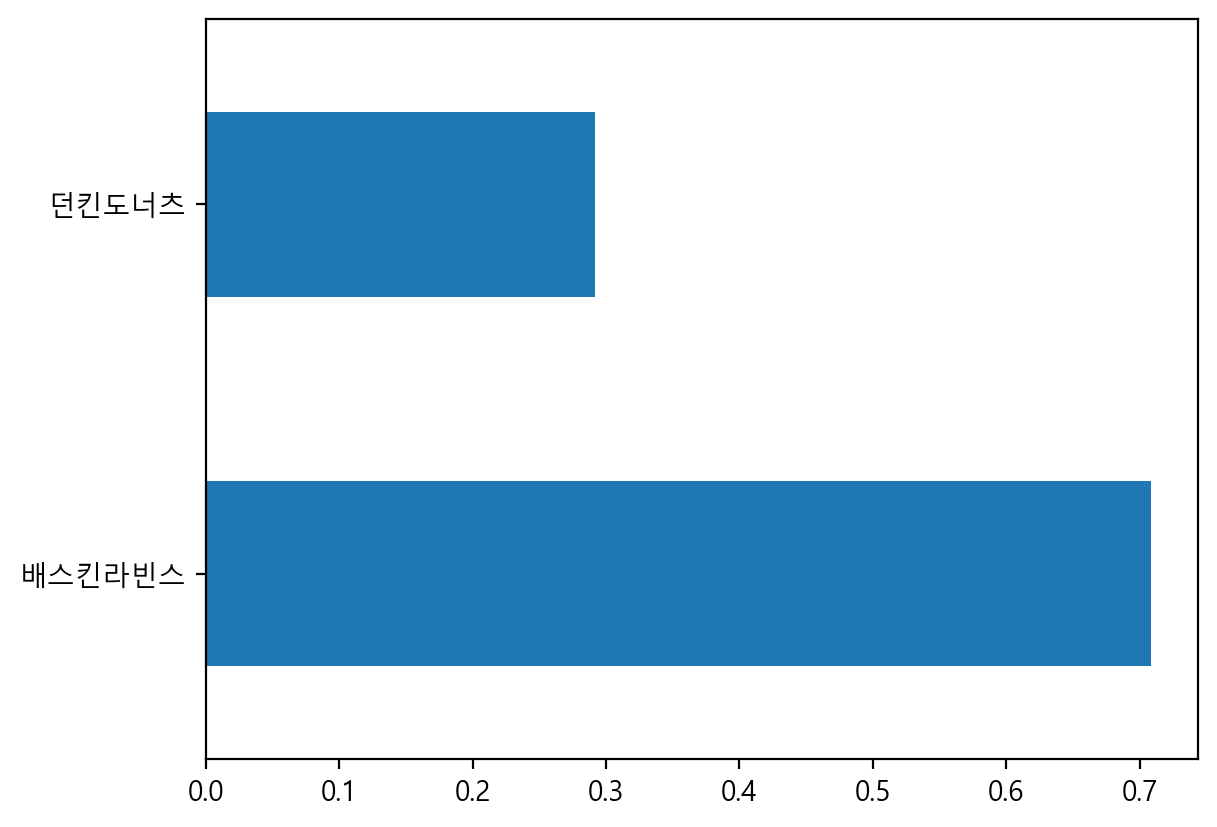

In [32]:
# 빈도수 비율
df_31['브랜드명'].value_counts(normalize=True).plot.barh()

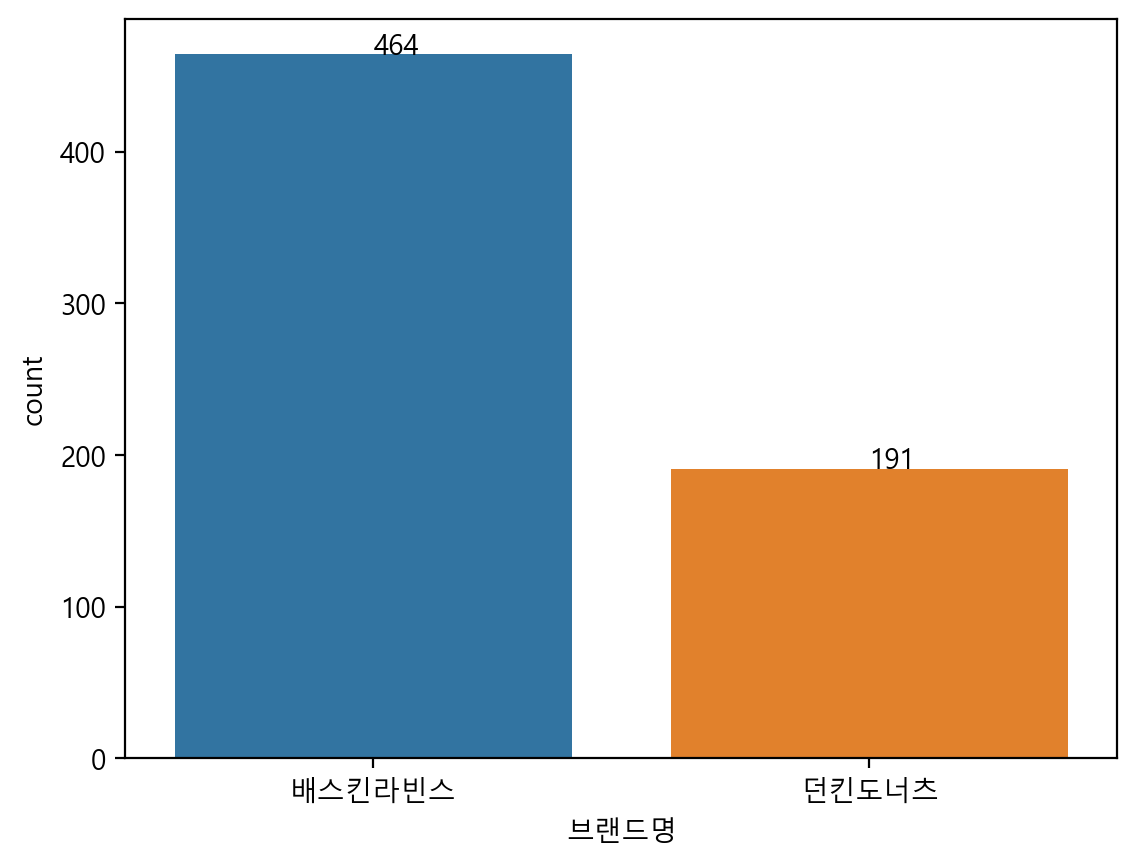

In [33]:
g = sns.countplot(data=df_31, x='브랜드명')

for i, val in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i], s=brand_count[i])

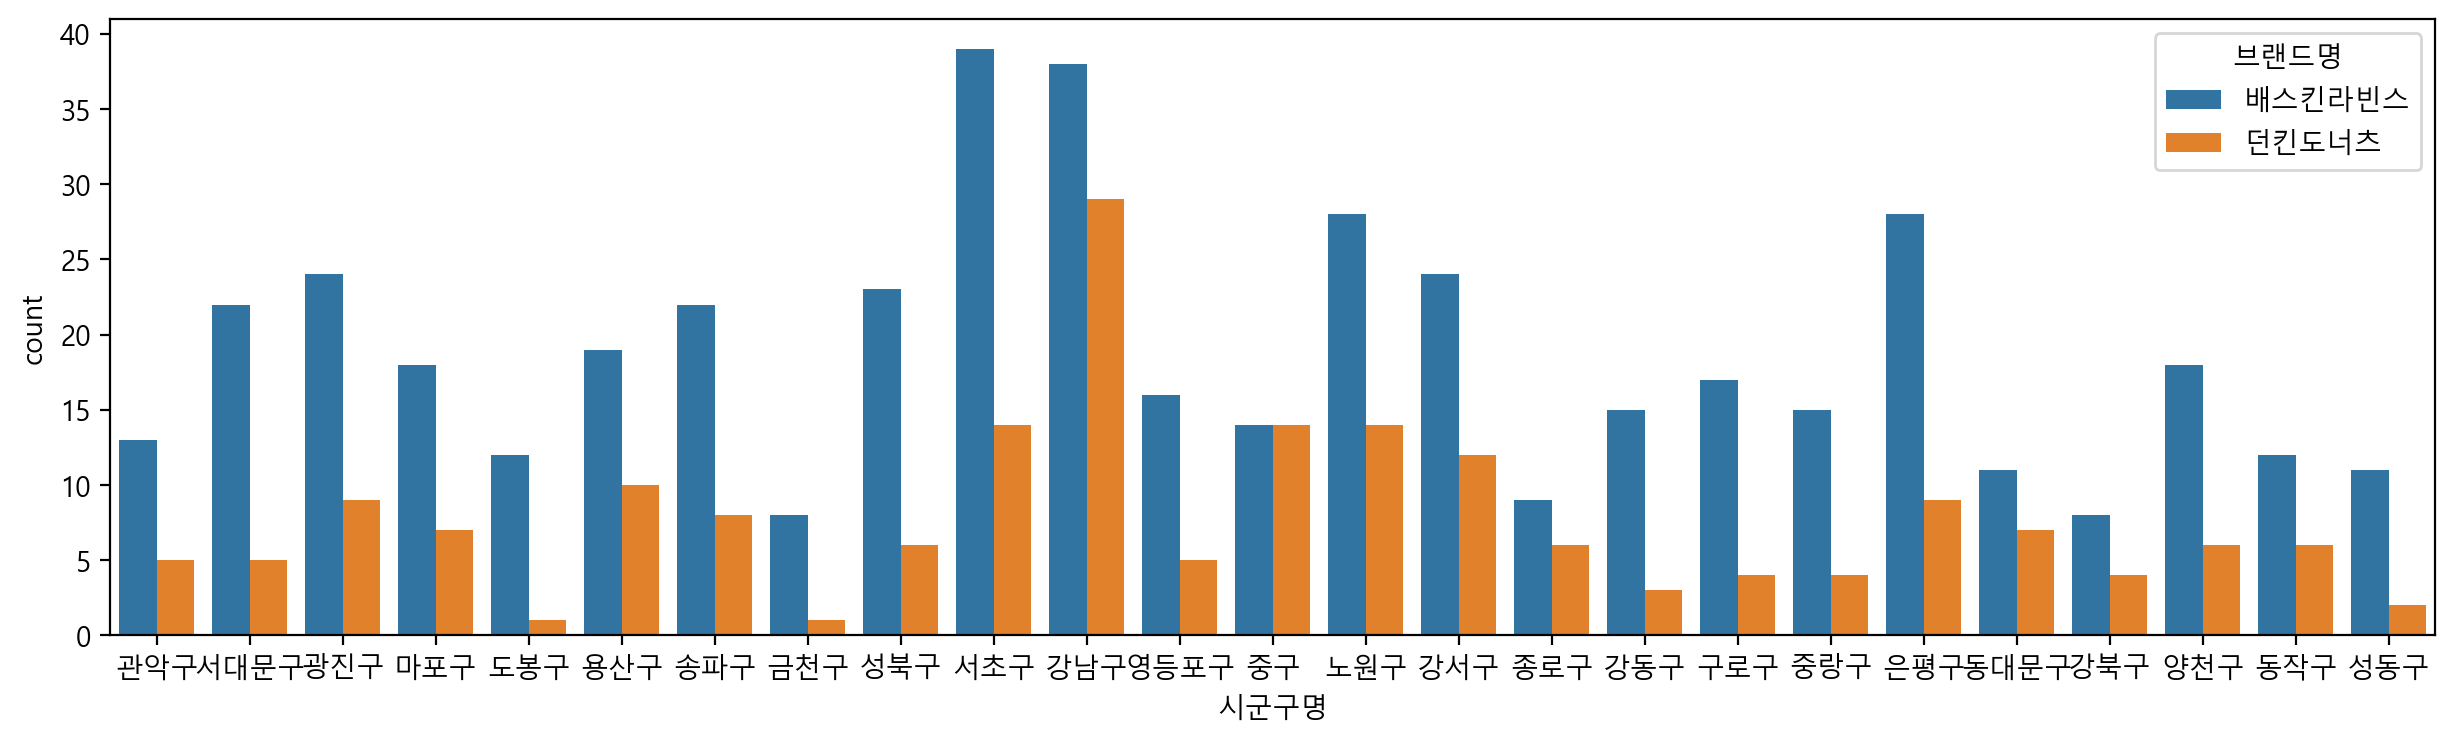

In [34]:
plt.figure(figsize=(15,4))
g = sns.countplot(data=df_31, x='시군구명', hue='브랜드명')

## scatterplot 그리기

<Axes: xlabel='경도', ylabel='위도'>

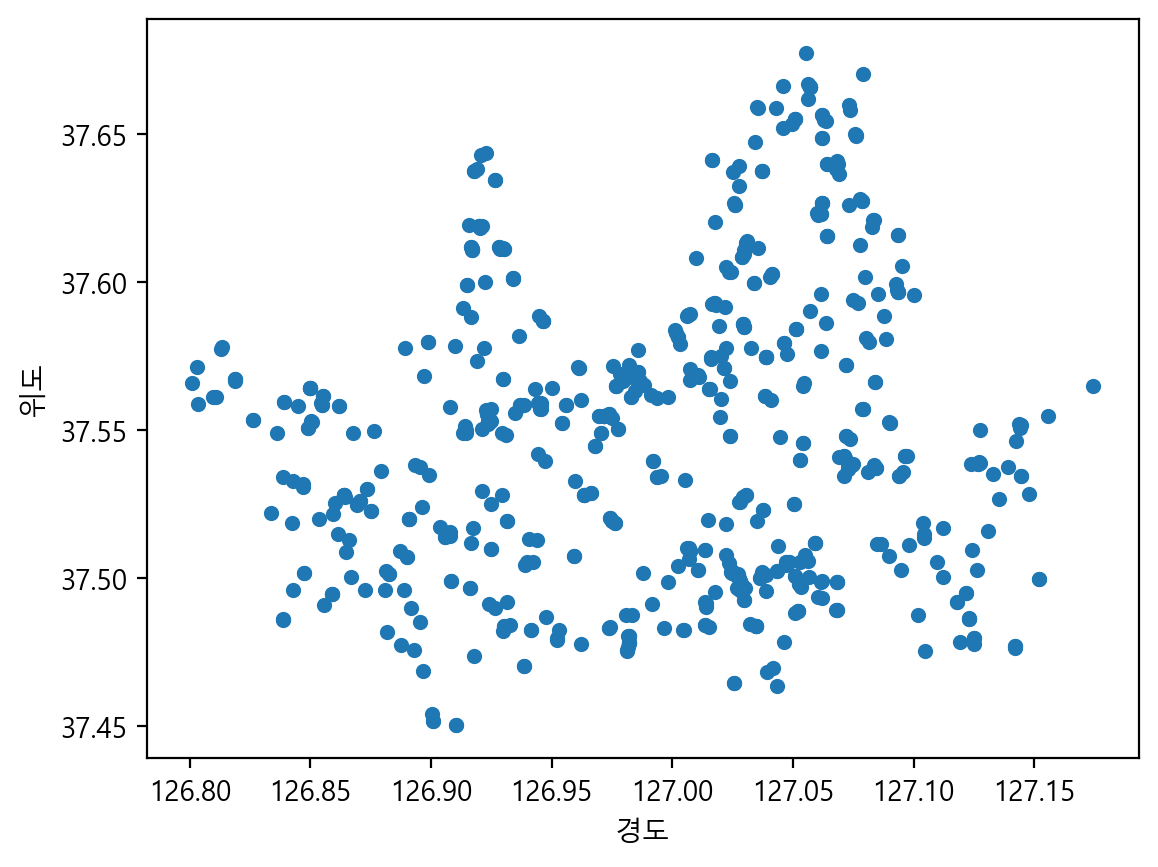

In [35]:
df_31[['위도','경도']].plot.scatter(x='경도',y='위도')

<Axes: xlabel='경도', ylabel='위도'>

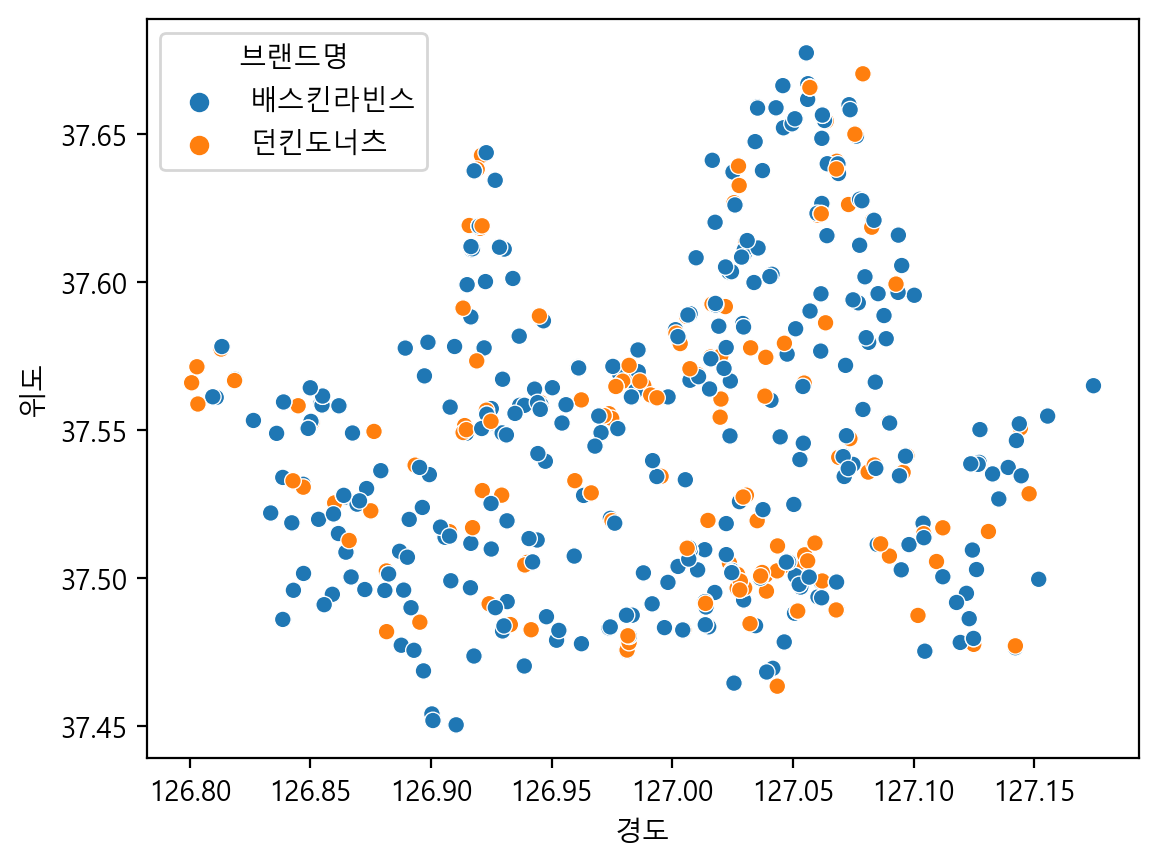

In [36]:
sns.scatterplot(data=df_31, x='경도', y='위도', hue='브랜드명')

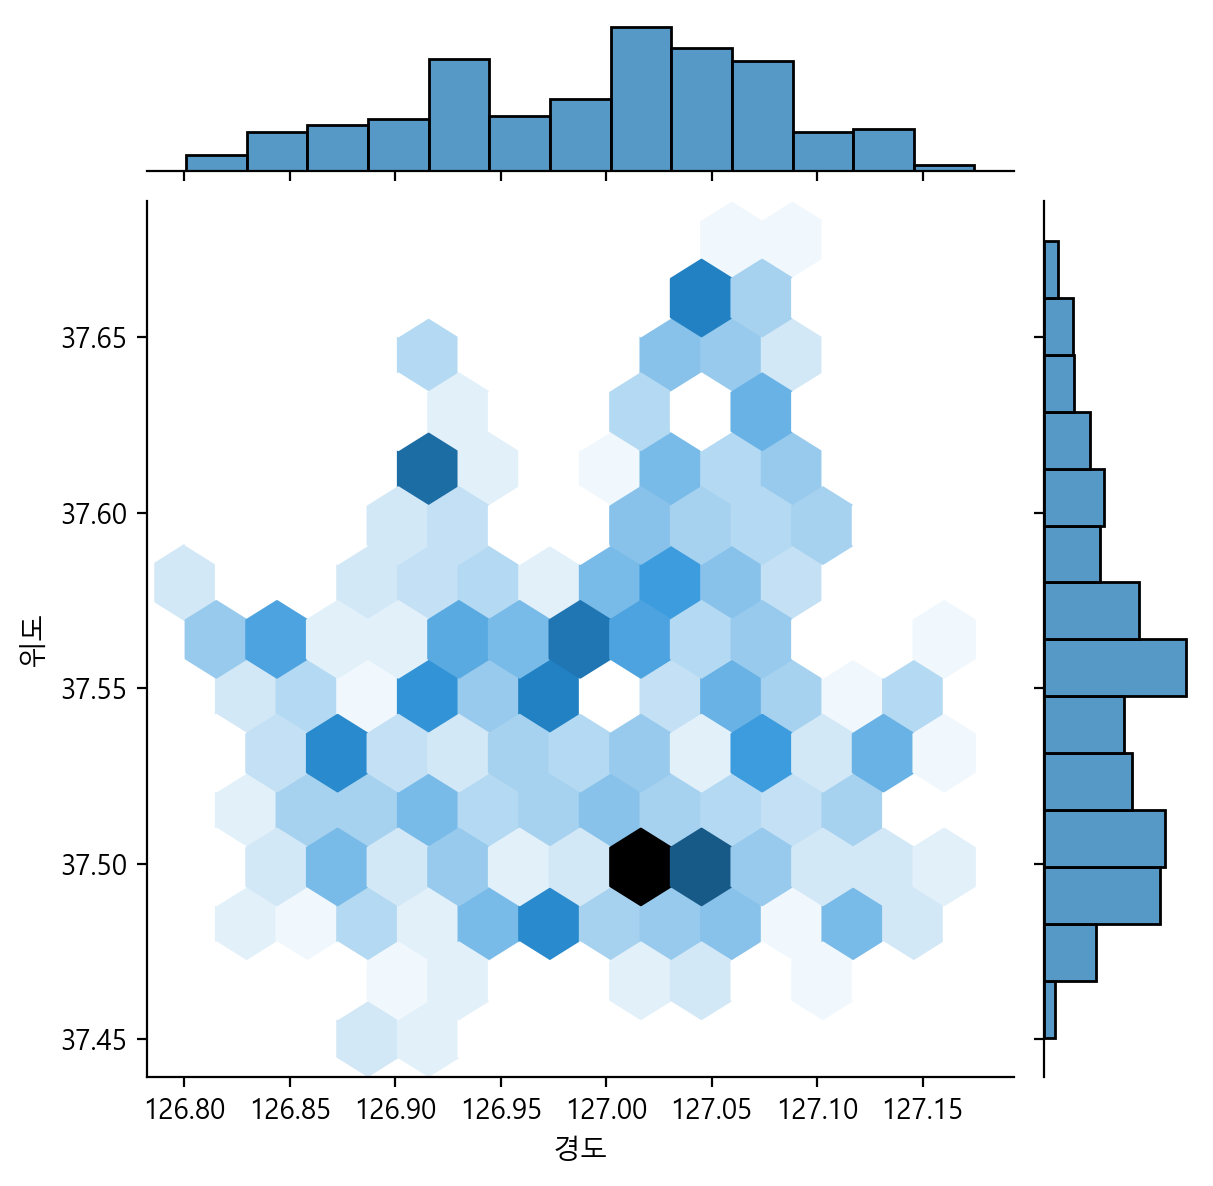

In [37]:
sns.jointplot(data=df_31, x='경도', y='위도', kind='hex')

## 파리바게뜨와 뚜레주르

In [38]:
df_seoul['상호명'].str.extract('뚜레(주|쥬)르')[0].value_counts()

쥬    257
주      1
Name: 0, dtype: int64

In [39]:
df_bread = df_seoul[df_seoul['상호명'].str.contains('뚜레(주|쥬)르|파리(바게|크라상)')].copy()
df_bread.shape

C:\Users\User\AppData\Local\Temp\ipykernel_13772\3121635501.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_bread = df_seoul[df_seoul['상호명'].str.contains('뚜레(주|쥬)르|파리(바게|크라상)')].copy()


(825, 12)

In [40]:
# 가져온 데이터 맞는지 확인
df_bread['상권업종대분류명'].value_counts()

음식       823
학문/교육      2
Name: 상권업종대분류명, dtype: int64

In [41]:
df_bread[df_bread['상권업종대분류명'] == '학문/교육']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
354693,파리바게뜨교육소,학문/교육,학원-자격/국가고시,학원-제과기술,서울특별시,영등포구,영등포동,영등포동8가,서울특별시 영등포구 영중로 159,126.905405,37.530553,파리바게뜨교육소
406627,뚜레쥬르,학문/교육,학원-자격/국가고시,학원-제과기술,서울특별시,금천구,가산동,가산동,서울특별시 금천구 가산디지털1로 128,126.883684,37.477224,뚜레쥬르


In [42]:
print(df_bread.shape)
df_bread = df_bread[df_bread['상권업종대분류명'] != '학문/교육'].copy()
print(df_bread.shape)

(825, 12)
(823, 12)


In [43]:
df_bread['상호명'].unique()

array(['뚜레쥬르', '파리바게뜨길동사거리점', '파리바게뜨상계제일점', '뚜레쥬르중계브라운', '파리바게뜨-판매옥수점',
       '파리바게뜨당고개점', '파리바게뜨목동오거리점', '뚜레쥬르신당역점', '파리바게뜨', '파리바게뜨서강신수점',
       '파리크라상', '파리바게뜨수유중앙점', '파리바게뜨가락중앙점', '파리바게뜨종로구기',
       '뚜레쥬르왕십리민자역사점왕십리민자역사점', '파리크라상교대역점', '뚜레쥬르도선사거리점', '여의도2호파리크라상',
       '목동파리크라상', '뚜레쥬르개봉역점', '파리바게뜨외대점', '파리크라상파스쿠찌홍', '파리크라상파스쿠찌압',
       'CJ뚜레쥬르', '신목파리바게뜨', '방주산업뚜레쥬르광화문경희궁의', '파리크라상파스쿠찌서', '파리크라상파스쿠찌도',
       '강동경희파리바게뜨', '파리크라상이대점', '파리크라상파스쿠찌압구정역2호', '뚜레쥬르송천센트레빌점',
       '파리크라상잠바주스디큐브', '파리크라상잠바주스대치역', '파리바게트', '상계뚜레쥬르', '뚜레쥬르대림3동점',
       '뚜레쥬르목4동점', '카페약수파리바게트', '파리바게뜨가좌역점', '파리바게뜨영등포구청점', '뚜레쥬르독산지식센터점',
       '파리바게뜨수락리버시티', '파리바게뜨방학중앙점', '파리바게뜨중계2호점', '뚜레쥬르방화역점', '파리바게뜨중앙대점',
       '뚜레쥬르레이크펠리스점', '파리바게뜨장안현대점', '뚜레쥬르우이점', '파리바게뜨성북점', '뚜레쥬르양천푸른점',
       '파리바게뜨마장대로점', '파리바게뜨문정역점', '뚜레쥬르엔시티보라매', '파리바게뜨종로시그니처점',
       '파리바게뜨상계보람점', '파리바게뜨성동세무서점', '파리바게뜨여의경도점', '파리바게뜨구로제일점',
       '뚜레쥬르창동SM마트', '파리바게뜨카페대학로점', '파리바게뜨대림역점', '파리바게뜨월계미성', '파리크라상서래점',
       '파리바게뜨금천한양점', '씨

In [44]:
print(df_bread.shape)
df_bread = df_bread[-df_bread['상호명'].str.contains('파스쿠찌|잠바주스')].copy()
print(df_bread.shape)

(823, 12)
(812, 12)


In [45]:
df_bread.loc[df_bread["상호명"].str.contains("파리바게"), "브랜드명"] = "파리바게뜨"
df_bread[['상호명', '브랜드명']].head()

,상호명,브랜드명
2935,뚜레쥬르,NaN
13843,뚜레쥬르,NaN
14031,파리바게뜨길동사거리점,파리바게뜨
14229,파리바게뜨상계제일점,파리바게뜨
14246,뚜레쥬르중계브라운,NaN


In [46]:
df_bread['브랜드명'] = df_bread['브랜드명'].fillna('뚜레쥬르')
df_bread[['상호명', '브랜드명']].head()

,상호명,브랜드명
2935,뚜레쥬르,뚜레쥬르
13843,뚜레쥬르,뚜레쥬르
14031,파리바게뜨길동사거리점,파리바게뜨
14229,파리바게뜨상계제일점,파리바게뜨
14246,뚜레쥬르중계브라운,뚜레쥬르


## 범주형 변수 빈도수

In [47]:
df_bread['브랜드명'].value_counts()

파리바게뜨    515
뚜레쥬르     297
Name: 브랜드명, dtype: int64

In [48]:
df_bread['브랜드명'].value_counts(normalize=True)

파리바게뜨    0.634236
뚜레쥬르     0.365764
Name: 브랜드명, dtype: float64

<Axes: xlabel='브랜드명', ylabel='count'>

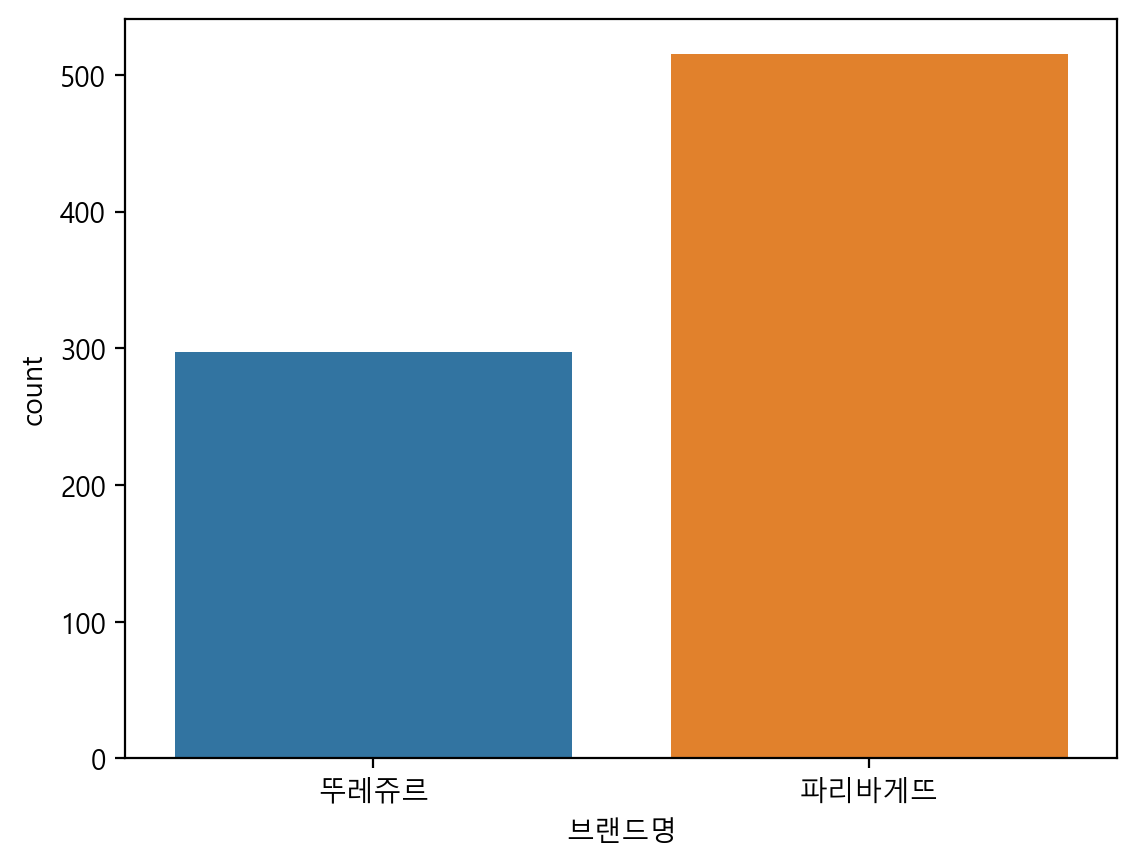

In [49]:
sns.countplot(data=df_bread, x='브랜드명')

<Axes: xlabel='시군구명', ylabel='count'>

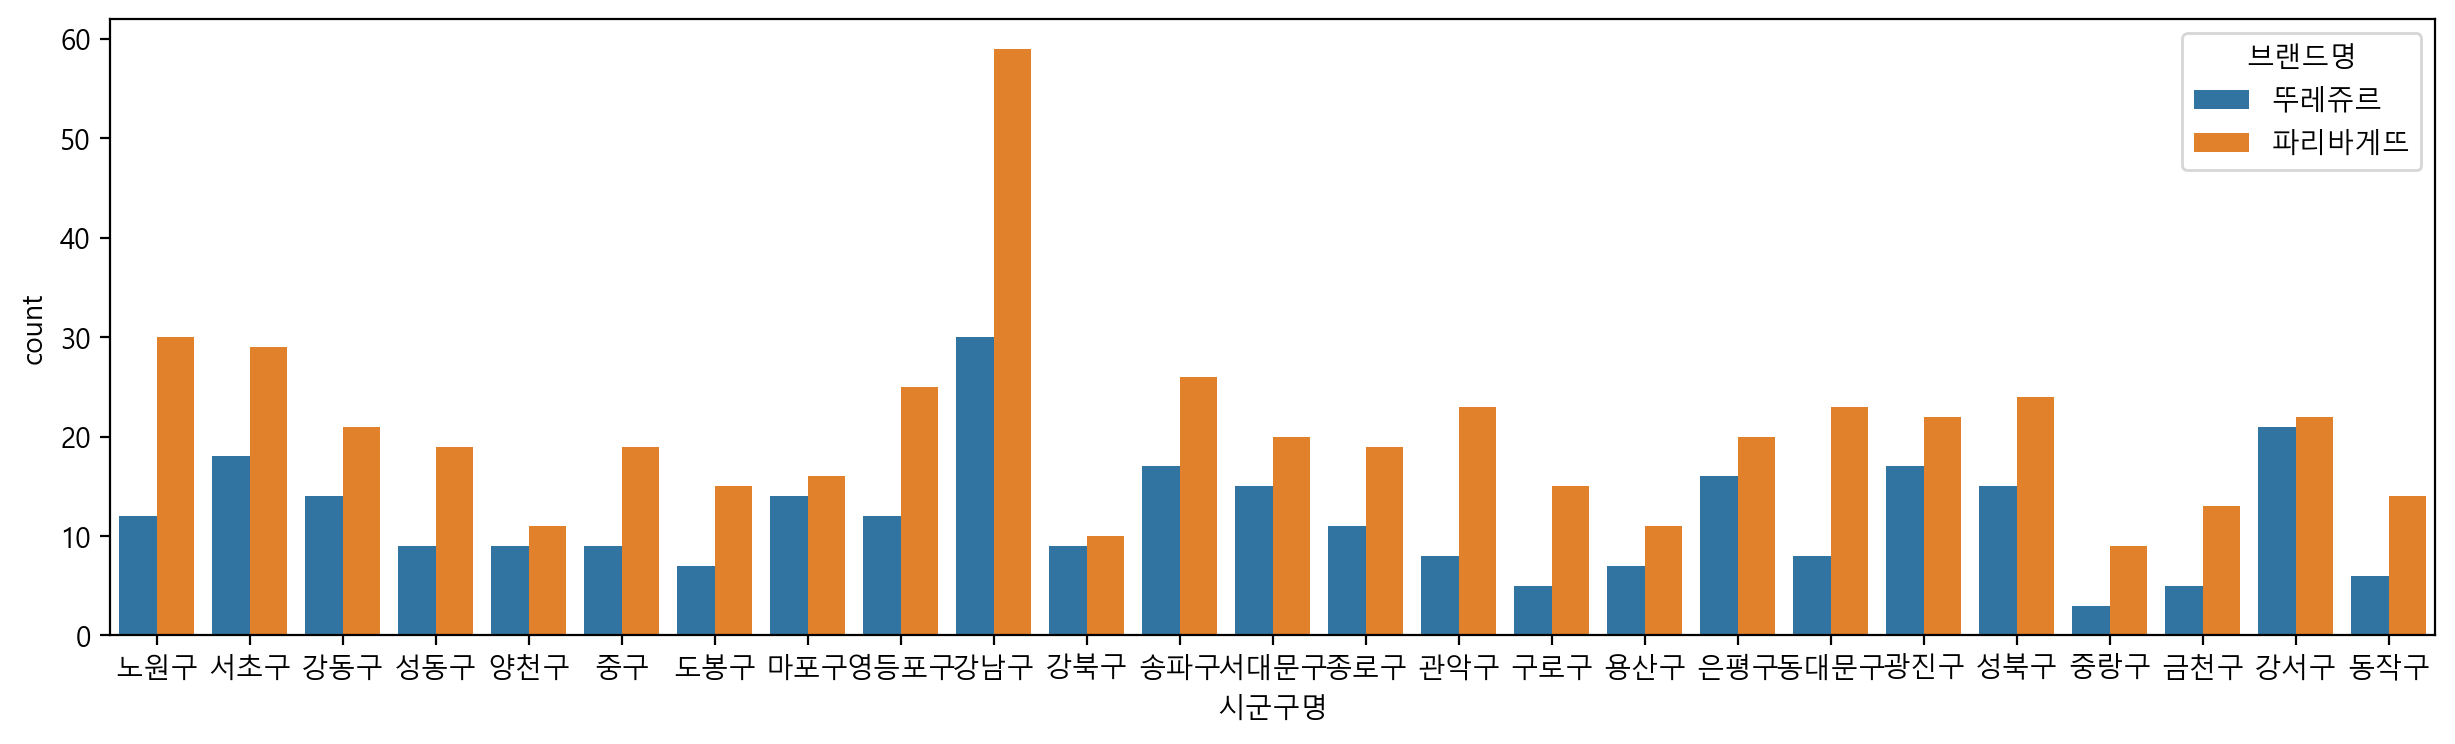

In [50]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_bread, x='시군구명', hue='브랜드명')

<Axes: xlabel='경도', ylabel='위도'>

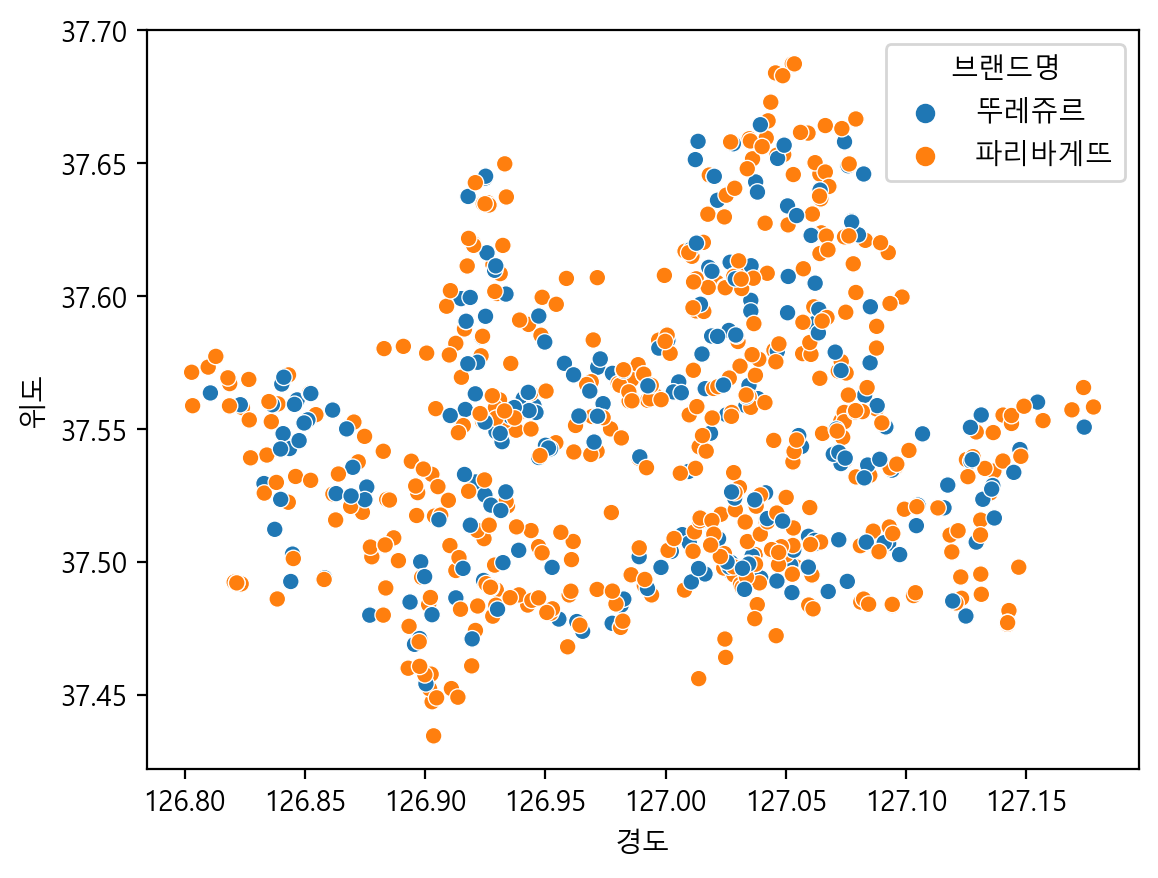

In [51]:
sns.scatterplot(data=df_bread, x='경도', y='위도', hue='브랜드명')

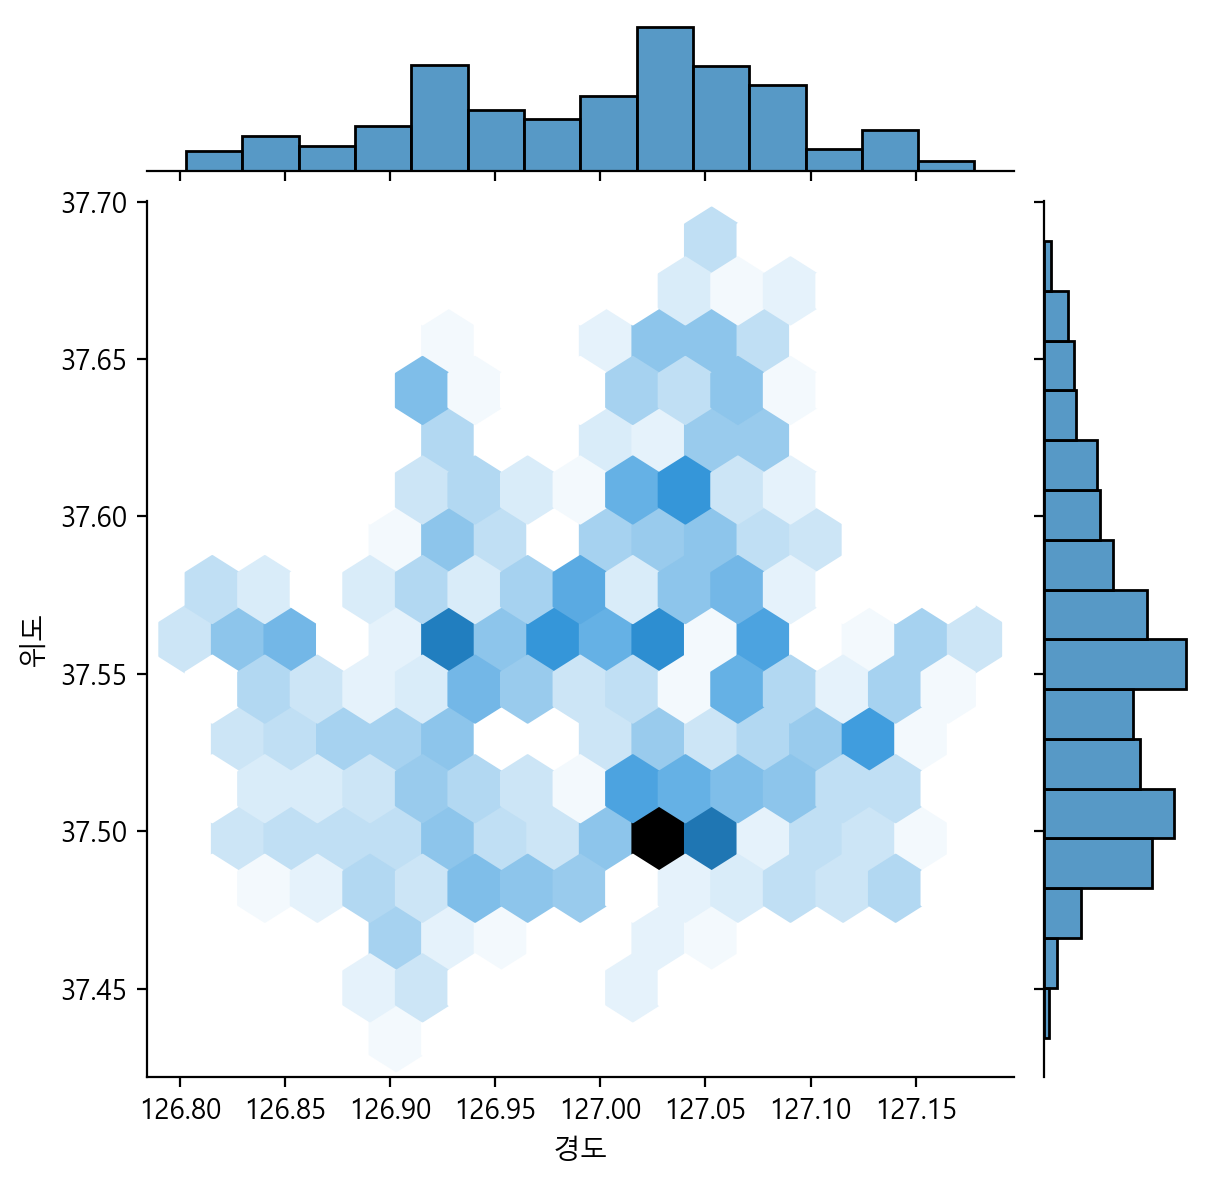

In [52]:
sns.jointplot(data=df_bread, x='경도', y='위도', kind='hex')